In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

# MultiClass Classification Problem

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is **TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in**. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

# Read the data

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
# show the first training sample
print(train_data[0])
print('\n')
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [4]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

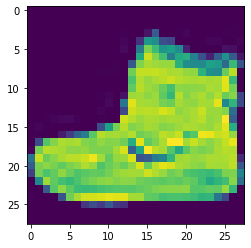

In [6]:
# plot a single sample
plt.imshow(train_data[0])

In [7]:
# chech out samples label
train_labels[0]

9

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

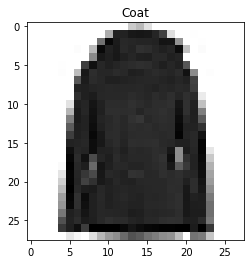

In [9]:
# Plot an example image and its label
index_of_choice=2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[index_of_choice]]);

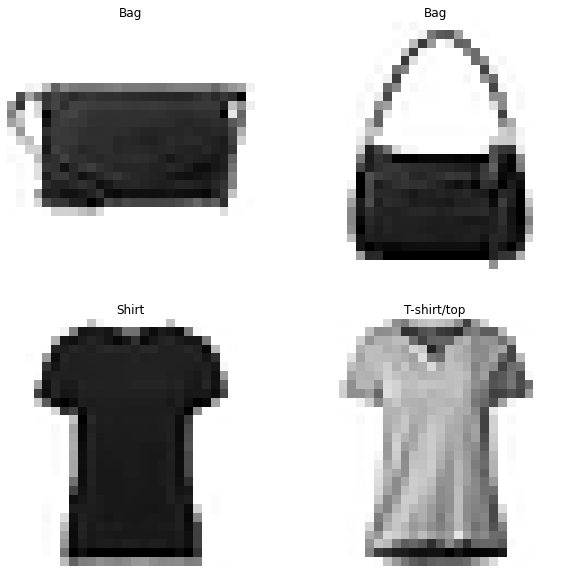

In [10]:
# plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(10,10))
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

# Modelling

In [11]:
# set random seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

# fit the model
non_normal_history = model.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 2.1752 - accuracy: 0.1591 - val_loss: 1.8012 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.7094 - accuracy: 0.2494 - val_loss: 1.6764 - val_accuracy: 0.2927
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.6365 - accuracy: 0.2825 - val_loss: 1.6026 - val_accuracy: 0.2770
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6125 - accuracy: 0.2839 - val_loss: 1.6036 - val_accuracy: 0.2971
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.5944 - accuracy: 0.3031 - val_loss: 1.5847 - val_accuracy: 0.3205
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.5894 - accuracy: 0.3094 - val_loss: 1.5732 - val_accuracy: 0.3255
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.5757 - accuracy: 0.3211 - val_loss: 1.5639 - val_ac

1. loss and accuracy in the result is for the training dataset
2. val_loss and val_accuracy is for the test data

right now model accuracy is at 33% on both train and test data

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# Data Transform (normalization)
neural networks prefer scaled data.

In [13]:
# We can get our training and testing data between 0 and 1 by division by maximum

In [14]:
train_data.min()

0

In [15]:
train_data.max()

255

In [16]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

# Refitting the model with scaled data

In [17]:


# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

<AxesSubplot:title={'center':'normalizes data'}>

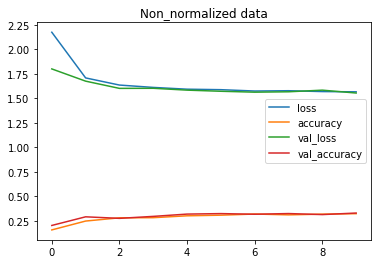

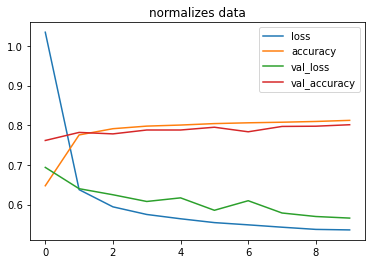

In [18]:
# compare loss curves for normalized data model and non normalized data model

pd.DataFrame(non_normal_history.history).plot(title="Non_normalized data")
pd.DataFrame(norm_history.history).plot(title="normalizes data")

Wow. From these two plots, we can see how much quicker our model with the normalized data (model_12) improved than the model with the non-normalized data (model_11).

    🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

# Finding the ideal Learning rate for neural networks

In [19]:
tf.random.set_seed(43)

# create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# fit the model
find_lr_history = model_3.fit(train_data,
                             train_labels,
                             epochs=40,
                             validation_data = (test_data, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5528 - accuracy: 0.4423 - val_loss: 1.2362 - val_accuracy: 0.5341 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0974 - accuracy: 0.6115 - val_loss: 1.0420 - val_accuracy: 0.6114 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9031 - accuracy: 0.6652 - val_loss: 0.8923 - val_accuracy: 0.6758 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 12s 7ms/step - loss: 0.8244 - accuracy: 0.7229 - val_loss: 0.8038 - val_accuracy: 0.7277 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7353 - accuracy: 0.7583 - val_loss: 0.7336 - val_accuracy: 0.7603 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6872 - accuracy: 0.7725 - val_loss: 0.7020 - val_accuracy: 0.7654 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

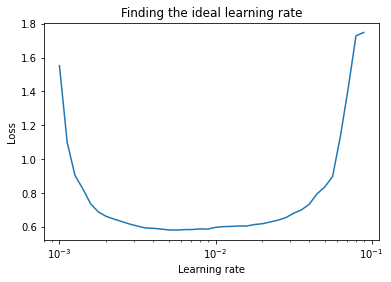

In [20]:
# # Plot the learning rate decay curve
# lrs = 1e-3 * (10**(tf.range(40)/20))
# plt.semilogx(lrs, find_lr_history.history["loss"])
# plt.xlabel("learning rate")
# plt.ylabel("Loss")
# plt.title("finding the ideal learning rate")

# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

the ideal learning rate comes to about 0.001

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

# Model Evaluation


Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:
1. Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
2. Assess some of its predictions (through visualizations).
3. Improve its accuracy (by training it for longer or changing the architecture).
4. Save and export it for use in an application.

Let's go through the first two options.
First we'll create a classification matrix to visualize its predictions across the different classes.

In [27]:
# make prediction using the model
y_probs = model_14.predict(test_data)
y_probs

array([[8.5630614e-11, 3.5362230e-13, 2.6633978e-05, ..., 9.1868825e-02,
        4.0605287e-03, 8.0787343e-01],
       [3.4278585e-06, 1.2899508e-16, 9.5989138e-01, ..., 1.1383794e-28,
        6.3272077e-04, 4.4790319e-08],
       [6.1063001e-05, 9.9657673e-01, 4.3867562e-08, ..., 7.3239134e-18,
        5.4812130e-08, 4.9226455e-14],
       ...,
       [7.8579649e-02, 2.2294778e-05, 1.4033382e-01, ..., 2.9533275e-20,
        1.1197243e-01, 4.7600213e-09],
       [3.3110959e-05, 9.9301308e-01, 2.3392467e-07, ..., 9.3986513e-15,
        8.1592924e-07, 1.2159066e-11],
       [7.9816395e-08, 7.7579304e-10, 1.6470684e-04, ..., 4.3826427e-02,
        1.5162556e-03, 3.9120615e-02]], dtype=float32)

In [28]:
# convert all predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 3, 1, 5], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = test_labels,
                      y_pred=y_preds)
cm

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

In [42]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

     # Label the axes
    ax.set(title="Confusion Matrix",
             xlabel="Predicted label",
             ylabel="True label",
             xticks=np.arange(n_classes), # create enough axis slots for each class
             yticks=np.arange(n_classes), 
             xticklabels=labels, # axes will labeled with class names (if they exist) or ints
             yticklabels=labels)

      # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

      # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

      # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

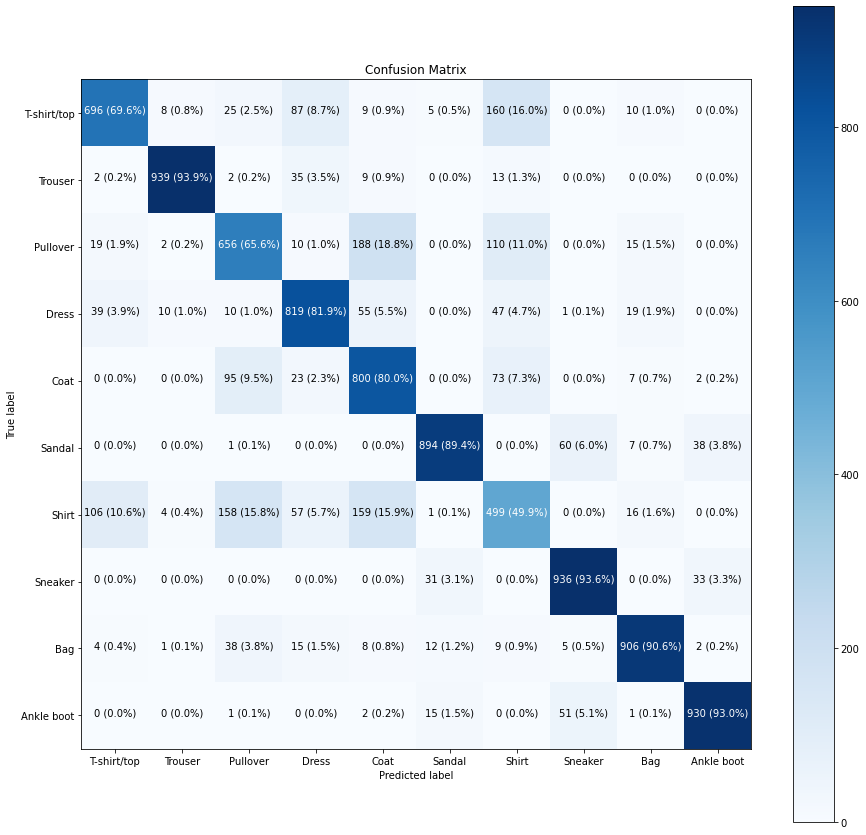

In [43]:
# confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).
 🤔 Question: Does it make sense that our model is getting confused between the Shirt and T-shirt/top classes? Why do you think this might be? What's one way you could investigate?


# Visualize Model Outputs

In [51]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
    # Setup random integer
    i = random.randint(0, len(images))

   # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                       100*tf.reduce_max(pred_probs),
                                                       true_label),
                 color=color) # set the color to green or red

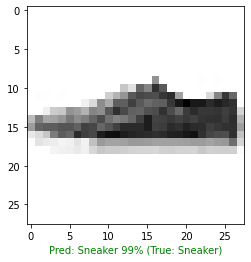

In [54]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

# What Patterns is our model learning

We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (model_14) using the layers attribute.

In [55]:
# find layers of model 14
model_14.layers

we can inspect each layer by indexing

In [56]:
# Extract a particular layer
model_14.layers[1]



And we can find the patterns learned by a particular layer using the get_weights() method.

The get_weights() method returns the weights (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.


In [57]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.7150267 , -0.06077141, -0.9976308 , -1.0484312 ],
        [ 0.27732134, -0.4715548 , -0.52916443,  0.02329269],
        [ 0.775243  ,  0.540275  , -1.1288565 , -0.742615  ],
        ...,
        [-0.39453417,  0.47628608, -0.22641543,  0.25505942],
        [-0.40515763,  0.61810094,  0.23928423, -0.503876  ],
        [ 0.23884583,  0.11606929, -0.12131436,  0.04352444]],
       dtype=float32),
 (784, 4))

In [60]:
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.

# Lets check out the BIAS vectors

In [61]:
# shape = 1 bias per neuron( we use 4 neurons in the first layer)
biases, biases.shape

(array([ 2.4486011e-02, -6.1498414e-04, -2.7230123e-01,  8.1124878e-01],
       dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.


In [62]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to every layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility plot_model().

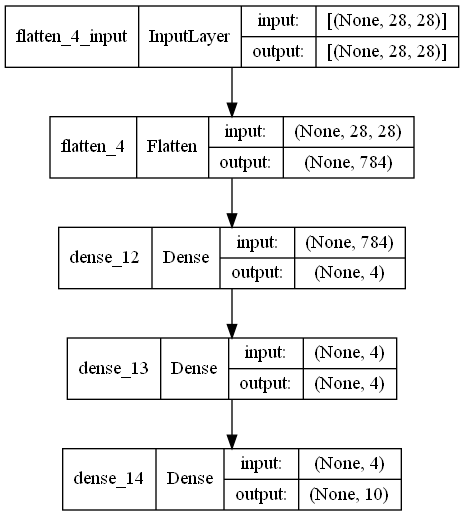

In [63]:
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# How a model learns in Brief

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.